In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import galomatch
import utils

%load_ext autoreload
%autoreload 2

In [60]:
mmains = utils.load_mmains(1)
mmains = galomatch.utils.list_to_ndarray(mmains, ["ra", "dec", "mass_cl"])




sim = mmains[0, ...]
sim = sim[sim[:, 2] > 1e13, :]


Nsim = sim.shape[0]

obs = utils.load_2mpp()
Nobs = obs.size

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 14.00it/s]


In [64]:
RA1 = obs["RA"]
DEC1 = obs["DEC"]

RA2 = sim[:, 0]
DEC2 = sim[:, 1]

bins = np.logspace(np.log10(0.005), np.log10(10.0), 15)

In [65]:
# galomatch.match.angular_tpcf(bins, RA1, DEC1, RA2, DEC2)

x2 = galomatch.match.angular_tpcf(bins, RA1, DEC1, RA2, DEC2, nthreads=4)

In [59]:
x1

array([0.13043478, 0.10766962, 0.13362303, 0.11824462, 0.01801593,
       0.03511272, 0.0232627 , 0.0178794 , 0.02238606, 0.01626349,
       0.02416338, 0.01197215, 0.0068578 , 0.00023389])

In [66]:
x2

array([ 1.80645161,  0.47488584,  0.35758514,  0.12919897,  0.01123004,
       -0.00798703, -0.01509933,  0.03254605,  0.04490233,  0.06433221,
        0.04508124,  0.04036567,  0.03340385,  0.01902858])

<IPython.core.display.Javascript object>


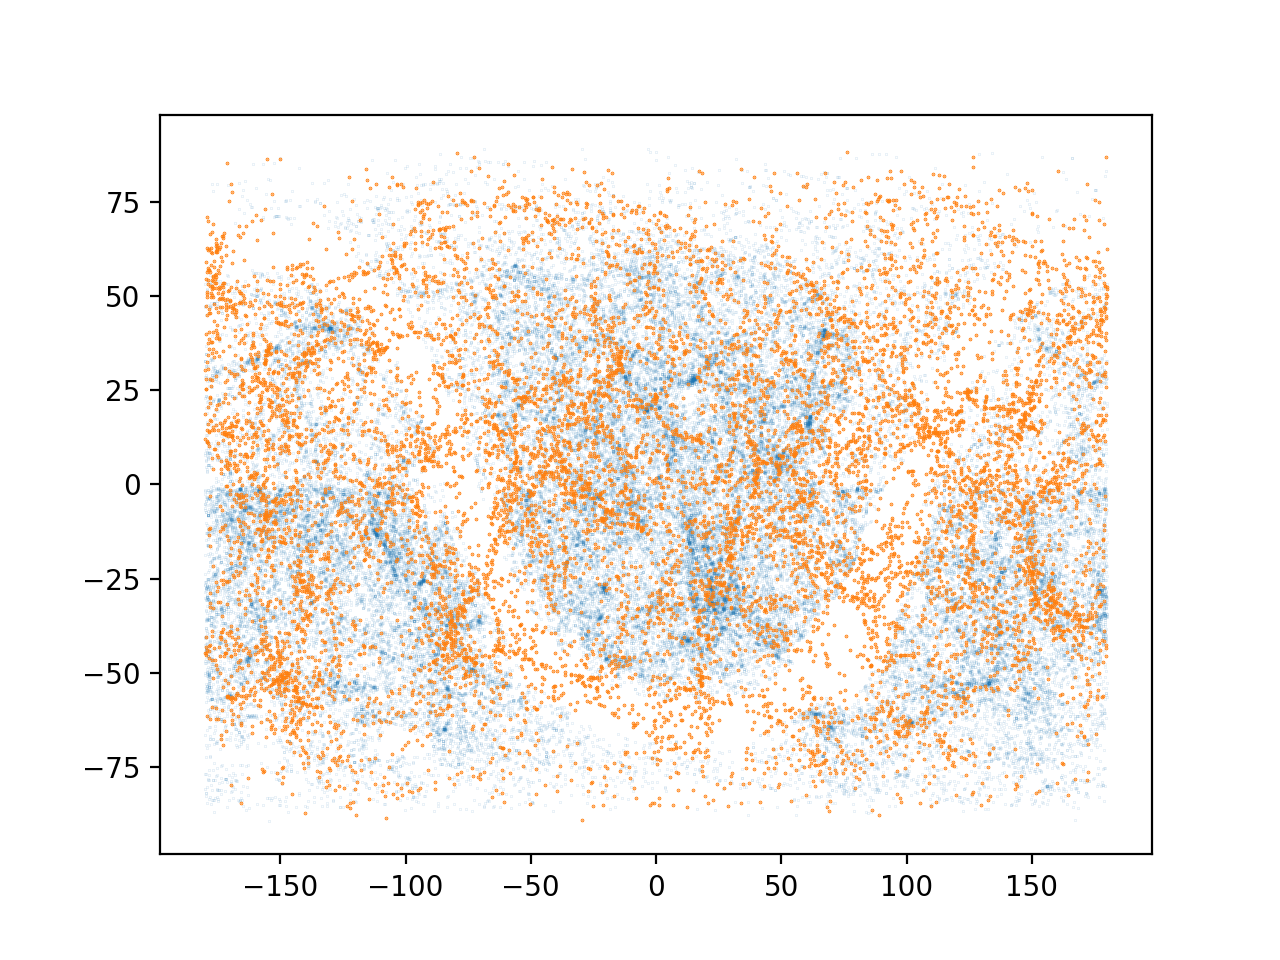

In [67]:
plt.figure()

plt.scatter(RA1, DEC1, s=0.001)
plt.scatter(RA2, DEC2, s=0.1)

plt.show()

In [ ]:
randNsim = Nsim * 5
randNobs = Nobs * 5
randRAsim, randDECsim = galomatch.match.get_randoms_sphere(randNsim, seed=42)
randRAobs, randDECobs = galomatch.match.get_randoms_sphere(randNobs, seed=21)

In [ ]:
from Corrfunc.mocks import DDtheta_mocks
from Corrfunc.utils import convert_3d_counts_to_cf



nthreads = 1

RA1 = obs["RA"]
DEC1 = obs["DEC"]
RA2 = RA1
DEC2 = DEC1
# RA2 = sim[:, 0]
# DEC2 = sim[:, 1]


D1D2 = DDtheta_mocks(0, nthreads, bins, RA1, DEC1, RA2=RA2, DEC2=DEC2)

D1R2 = DDtheta_mocks(0, nthreads, bins, RA1, DEC1, RA2=randRAsim, DEC2=randDECsim)

D2R1 = DDtheta_mocks(0, nthreads, bins, RA2, DEC2, RA2=randRAobs, DEC2=randDECobs)

R1R2 = DDtheta_mocks(0, nthreads, bins, randRAobs, randDECobs, RA2=randRAsim, DEC2=randDECsim)

cf = convert_3d_counts_to_cf(Nobs, Nsim, randNobs, randNsim, D1D2, D1R2, D2R1, R1R2)



In [ ]:
convert_3d_counts_to_cf()

In [ ]:
x = [0.5 * (bins[i + 1] + bins[i]) for i in range(bins.size - 1)]

plt.figure()
plt.plot(x, cf)

# plt.yscale("log")
plt.xscale("log")
plt.show()

In [ ]:
plt.figure()
plt.plot(DR["thetaavg"], DR["npairs"])
plt.yscale("log")
plt.xscale("log")

plt.show()

In [ ]:
cf = convert_3d_counts_to_cf(Ngals, Ngals, randN, randN, DD, DR, DR, RR)

In [ ]:
fpath = "/mnt/zfsusers/rstiskalek/galomatch/data/HFI_PCCS_SZ-union_R2.08.fits"
obs = galomatch.io.read_planck2015(fpath, cosmo, 214)


c1 = SkyCoord(ra=obs["RA"]*u.degree, dec=obs["DEC"]*u.degree, distance=obs["COMDIST"]*u.Mpc)
c2 = SkyCoord(ra=sim["ra"]*u.degree, dec=sim["dec"]*u.degree, distance=sim["dist"]*u.Mpc)

sep, indxs = galomatch.match.brute_spatial_separation(c1, c2, N=100, angular=False, verbose=True, )